In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt
import os

In [2]:
# Load the English NLP model (you only need to do this once)
# !python3 -m spacy download en_core_web_sm

In [3]:
def load_and_process_book(file_path, nlp_model):
    """
    Read a text file and process it with a spaCy model.

    Args:
        file_path (str): Path to the text file.
        nlp_model (spacy.lang): Loaded spaCy language model.

    Returns:
        spacy.tokens.Doc: The processed spaCy document.
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    return nlp_model(text)

def visualize_entities(doc, n=200):
    """
    Visualize named entities in the first n tokens of a spaCy document using displacy.

    Args:
        doc (spacy.tokens.Doc): The spaCy-processed document.
        n (int): Number of tokens from the start of the document to visualize.

    Returns:
        None. Displays the visualization in the notebook.
    """
    from spacy import displacy
    displacy.render(doc[:n], style="ent", jupyter=True)

def filter_sentences_with_entities(sent_entity_df):
    """
    Return only sentences that contain at least one entity.

    Args:
        sent_entity_df (pd.DataFrame): DataFrame with an 'entities' column.

    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    return sent_entity_df[sent_entity_df['entities'].map(len) > 0]

def extract_first_names(entity_list):
    """
    Extract first names from a list of full names.

    Args:
        entity_list (list): List of full name strings.

    Returns:
        list: List of first names.
    """
    return [item.split()[0] for item in entity_list]

def plot_networkx_graph(G, figsize=(10,10)):
    """
    Plot a NetworkX graph using matplotlib.

    Args:
        G (networkx.Graph): The graph to plot.
        figsize (tuple): Figure size.

    Returns:
        None. Displays the plot.
    """
    import networkx as nx
    plt.figure(figsize=figsize)
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
    plt.show()

In [4]:
# Load spacy English languague model (small version)
NER = spacy.load("en_core_web_sm")

In [5]:
# Get all book files in the data directory
all_books = [b for b in os.scandir('../data') if '.txt' in b.name]
all_books

[<DirEntry 'Master-and-Commander.txt'>, <DirEntry 'H.M.S.-Surprise.txt'>]

In [6]:
# Load the first book text file, read its contents, and process it with spaCy for NLP analysis
book = all_books[0]
book_text = open(book).read()
#book_doc = NER(book_text)
book_doc = load_and_process_book(all_books[0], NER)

In [7]:
# Visualize identified entities
#displacy.render(book_doc[0:200], style="ent", jupyter=True)
visualize_entities(book_doc, n=200)

In [8]:
# Extract character names from both books and save to a dataframe
book_files = [
    ('Master and Commander', '../data/Master-and-Commander.txt'),
    ('HMS Surprise', '../data/H.M.S.-Surprise.txt')
]

character_data = []
for book_title, file_path in book_files:
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    doc = NER(text)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            character_data.append({'book': book_title, 'character': ent.text})

character_df = pd.DataFrame(character_data)
character_df

,book,character
0,Master and Commander,Locatelli
1,Master and Commander,Jack Aubrey's
2,Master and Commander,Jack
3,Master and Commander,Jack
4,Master and Commander,Jack
...,...,...
3912,HMS Surprise,Jack
3913,HMS Surprise,Jack
3914,HMS Surprise,Stephen
3915,HMS Surprise,Stephen


In [9]:
# Remove duplicate character names within each book and display all rows
pd.set_option('display.max_rows', None)
character_df = character_df.drop_duplicates(subset=['book', 'character'])
character_df

,book,character
0,Master and Commander,Locatelli
1,Master and Commander,Jack Aubrey's
2,Master and Commander,Jack
7,Master and Commander,Mrs Harte
8,Master and Commander,Jack Aubrey
9,Master and Commander,Saturn
10,Master and Commander,Molly Harte
19,Master and Commander,Allen
25,Master and Commander,Hunks
26,Master and Commander,Samuel Allen


In [10]:
!pip install coreferee

In [11]:
import coreferee
!python -m coreferee install en

  Using cached https://github.com/richardpaulhudson/coreferee/raw/master/models/coreferee_model_en.zip (65.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [12]:
import coreferee

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Add coreferee to the pipeline
nlp.add_pipe('coreferee')

In [13]:
doc = nlp(book_text)

# Print coreference chains
for chain in doc._.coref_chains:
    print(chain)

0: [41], [66]
1: [92], [126]
2: [145], [156], [173], [177], [212], [221], [232], [295], [298], [302], [315], [337], [344], [347]
3: [250], [252]
4: [304], [307]
5: [393], [412], [419], [428], [445], [450], [452], [478], [523], [531], [558], [565], [579], [601]
6: [436], [439]
7: [485], [490]
8: [505], [521]
9: [509], [515]
10: [632], [639]
11: [635], [651], [660], [662], [685], [691], [703], [708]
12: [663], [669], [671], [679]
13: [715], [725], [735], [737], [741], [751], [758], [854], [923], [928], [937], [954], [963], [966], [969], [980], [986], [993], [1001], [1021], [1026], [1041], [1045]
14: [717], [720], [731], [753], [761]
15: [820], [868]
16: [839], [843]
17: [846], [872]
18: [906], [925]
19: [914], [918], [939], [946]
20: [970], [982]
21: [1006], [1033]
22: [1042], [1062]
23: [1078], [1095]
24: [1099], [1158], [1216], [1225], [1234], [1236], [1241], [1288], [1366], [1374], [1376], [1382], [1399], [1405], [1414], [1421], [1477], [1479], [1542]
25: [1113], [1154], [1191], [1201

In [14]:
import re

def normalize_name(name):
    """
    Normalize a character name by converting it to lowercase, removing possessive 's, 
    stripping punctuation, and trimming whitespace.

    Args:
        name (str): The character name to normalize.

    Returns:
        str: The normalized character name.
    """
    name = name.lower()
    name = re.sub(r"'s\b", "", name)  # Remove possessive 's
    name = re.sub(r"[^\w\s]", "", name)  # Remove punctuation
    name = name.strip()
    return name

character_df['character_normalized'] = character_df['character'].apply(normalize_name)

/var/folders/k4/vg8gmwj941z_9rv5xw3mmt0m0000gn/T/ipykernel_69817/149541223.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  character_df['character_normalized'] = character_df['character'].apply(normalize_name)


In [15]:
character_df

,book,character,character_normalized
0,Master and Commander,Locatelli,locatelli
1,Master and Commander,Jack Aubrey's,jack aubrey
2,Master and Commander,Jack,jack
7,Master and Commander,Mrs Harte,mrs harte
8,Master and Commander,Jack Aubrey,jack aubrey
9,Master and Commander,Saturn,saturn
10,Master and Commander,Molly Harte,molly harte
19,Master and Commander,Allen,allen
25,Master and Commander,Hunks,hunks
26,Master and Commander,Samuel Allen,samuel allen


In [16]:
# Filter out common words or names that are not characters
blacklist = {
             "his majesty", 
             "sloop", 
             "locatelli",
             "finisterre",
             "saturn",
             "his majesty",
             "esqr",
             "alien",
             "boccherini"
             "port mahon",
             "mahon",
             "tarpaulin hats",
             "pigtail steps",
             "gib",
             "majesty",
             "thankee",
             "canaletto",
             "alicante",
             "mozart",
             "st philip",
             "fermanagh",
             "admiralty",
             "dead mens cloaths",
             "midshipman",
             "quarter",
             "bewildered hand",
             "madeira englishman",             
             }
character_df = character_df[~character_df['character_normalized'].isin(blacklist)]

In [17]:
# Define alias mapping (all keys and values should be normalized)
alias_map = {
    "jack": "jack aubrey",
    "aubrey": "jack aubrey",
    "lucky jack": "jack aubrey",
    "jack aubrey": "jack aubrey",
    "lieutenant aubrey": "jack aubrey",
    "stephen": "stephen maturin",
    "maturin": "stephen maturin",
    "dr maturin": "stephen maturin",
    "stephen deliberately": "stephen maturin",
    "stephen clung": "stephen maturin",  
}

# Map normalized names to canonical names
character_df['canonical_name'] = character_df['character_normalized'].map(alias_map).fillna(character_df['character_normalized'])

/var/folders/k4/vg8gmwj941z_9rv5xw3mmt0m0000gn/T/ipykernel_69817/3083376230.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  character_df['canonical_name'] = character_df['character_normalized'].map(alias_map).fillna(character_df['character_normalized'])


In [18]:
# Test the mapping by filtering for a specific character
character_df_filtered = character_df[character_df['canonical_name'] == "jack aubrey"].head()
character_df_filtered

,book,character,character_normalized,canonical_name
1,Master and Commander,Jack Aubrey's,jack aubrey,jack aubrey
2,Master and Commander,Jack,jack,jack aubrey
8,Master and Commander,Jack Aubrey,jack aubrey,jack aubrey
63,Master and Commander,Aubrey,aubrey,jack aubrey
148,Master and Commander,Lieutenant Aubrey,lieutenant aubrey,jack aubrey


In [19]:
# Remove duplicate character names within each book and display all rows
pd.set_option('display.max_rows', None)
character_df = character_df.drop_duplicates(subset=['book', 'canonical_name'])
character_df

,book,character,character_normalized,canonical_name
1,Master and Commander,Jack Aubrey's,jack aubrey,jack aubrey
7,Master and Commander,Mrs Harte,mrs harte,mrs harte
10,Master and Commander,Molly Harte,molly harte,molly harte
19,Master and Commander,Allen,allen,allen
25,Master and Commander,Hunks,hunks,hunks
26,Master and Commander,Samuel Allen,samuel allen,samuel allen
28,Master and Commander,James Bradby,james bradby,james bradby
30,Master and Commander,John Aubrey,john aubrey,john aubrey
32,Master and Commander,Thos Walker,thos walker,thos walker
33,Master and Commander,Teniente,teniente,teniente


In [20]:
# Count the number of rows in character_df
print(len(character_df))

712


In [21]:
# Get named entity list per sentence
def get_named_entities_per_sentence(doc):
    """
    Extracts a list of PERSON named entities for each sentence in a spaCy document.

    Args:
        doc (spacy.tokens.Doc): The spaCy-processed document.

    Returns:
        list: A list where each element is a list of PERSON entity strings found in a sentence.
    """
    sentences = list(doc.sents)
    named_entities = []
    for sentence in sentences:
        ents = [ent.text for ent in sentence.ents if ent.label_ == 'PERSON']
        named_entities.append(ents)
    return named_entities

named_entities = get_named_entities_per_sentence(NER(text))
print(named_entities)

[[], [], [], [], [], [], ['Joseph'], ['Joseph', 'Harte'], ['Breton'], ['Joseph'], [], [], [], [], ['Admiralty'], [], [], [], [], [], [], [], [], [], [], ['Parr'], ['Joseph'], [], [], [], [], [], [], [], ['Erskine'], [], ['Captains Sutton', 'Graham', 'Collins'], [], [], ['Joseph'], ['Sutton'], ['Sutton'], ['Aubrey'], ['Aubrey'], [], [], [], [], [], [], [], ['Joseph', 'Joseph'], [], [], [], ['Joseph Banks', 'Halley'], [], ['Joseph‘s'], [], [], [], ['Harte', 'Joseph'], ['Parr'], [], [], [], ['Harte', 'Joseph'], [], [], ['Aubrey'], [], [], ['Joseph‘s'], [], ['Joseph'], [], [], [], [], ['Joseph‘s'], [], ['Joseph', 'St Vincent'], [], [], [], [], [], ['Melville', 'Joseph', 'Dr Maturin'], [], [], ['Joseph', 'Melville'], [], ['Bonaparte'], [], [], ['Joseph'], [], [], [], [], [], [], [], [], ['Jack'], [], ['Stephen Maturin', 'Mrs Williams', 'Sophia', 'Frances', 'Sophia'], [], [], ['Aubrey'], [], [], [], [], [], [], ['Jack', 'Jack'], ['Nelson'], [], ['Stephen'], ['Jack'], ['Sophia', 'Savile'], ['

In [22]:
# Get named entity list per sentence
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)
sent_entity_df.head()

,sentence,entities
0,"(Chapter, 1, \n, The, music, -, room, in, the,...","[Chapter 1, House, Port Mahon, octagon, first,..."
1,"(The, players, ,, Italians, pinned, against, t...",[Italians]
2,"(And, on, the, little, gilt, chairs, at, least...","[two, the third row]"
3,"(The, \n, listener, farther, to, the, left, wa...",[]
4,"(He, \n, was, wearing, his, best, uniform, —, ...","[white waistcoat, the Royal Navy, Nile, first]"


In [23]:
# Get named entity list per sentence
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents if ent.label_ == 'PERSON']
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)
sent_entity_df.head()

,sentence,entities
0,"(Chapter, 1, \n, The, music, -, room, in, the,...",[Locatelli]
1,"(The, players, ,, Italians, pinned, against, t...",[]
2,"(And, on, the, little, gilt, chairs, at, least...",[]
3,"(The, \n, listener, farther, to, the, left, wa...",[]
4,"(He, \n, was, wearing, his, best, uniform, —, ...",[]


In [24]:
# Filter out sentences that don't have any character entities
#sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]
sent_entity_df_filtered = filter_sentences_with_entities(sent_entity_df)
sent_entity_df_filtered.head(10)

,sentence,entities
0,"(Chapter, 1, \n, The, music, -, room, in, the,...",[Locatelli]
7,"(The, words, ', Very, finely, played, ,, sir, ...",[Jack Aubrey's]
10,"(Only, part, of, Jack, 's, mind, paid, attenti...",[Jack]
13,"(About, my, own, \n, age, ,, in, fact, ,, howe...",[Jack]
17,"(\n, The, minuet, set, Jack, 's, head, wagging...",[Jack]
19,"(The, volume, of, sound, died, away, to, the, ...",[Jack]
20,"(Then, the, rest, of, the, quartet, joined, \n...",[Jack]
24,"(In, the, applause, and, general, din, his, ne...",[Mrs Harte]
25,"(Jack, Aubrey, looked, out, \n, of, the, long,...",[Jack Aubrey]
26,"(Saturn, was, rising, in, the, south, -, south...",[Saturn]


In [25]:
# Take only first name of characters
#sent_entity_df_filtered['entities'] = sent_entity_df_filtered['entities'].apply(lambda x: [item.split()[0] 
#sent_entity_df_filtered['entities'] = sent_entity_df_filtered['entities'].apply(extract_first_names)
#sent_entity_df_filtered = filter_sentences_with_entities(sent_entity_df)                                                                                                               for item in x])

In [26]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities
0,"(Chapter, 1, \n, The, music, -, room, in, the,...",[Locatelli]
7,"(The, words, ', Very, finely, played, ,, sir, ...",[Jack Aubrey's]
10,"(Only, part, of, Jack, 's, mind, paid, attenti...",[Jack]
13,"(About, my, own, \n, age, ,, in, fact, ,, howe...",[Jack]
17,"(\n, The, minuet, set, Jack, 's, head, wagging...",[Jack]
...,...,...
6059,"(\n, ', …, the, court, is, of, the, opinion, t...",[Aubrey]
6060,"(And, they, are, \n, hereby, acquitted, accord...",[Jack]
6061,"(\n, The, inaudible, voice, stopped, and, Jack...",[Jack]
6063,"(Jack, 's, clearing, \n, eyes, caught, Keats, ...","[Jack, Stirling]"


In [27]:
# Create relationships
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

# Create a DataFrame from the relationships
relationship_df = pd.DataFrame(relationships)
relationship_df.head(20)

,source,target
0,Jack Aubrey's,Jack
1,Jack Aubrey's,Jack
2,Jack Aubrey's,Jack
3,Jack,Mrs Harte
4,Jack,Mrs Harte
5,Mrs Harte,Jack Aubrey
6,Mrs Harte,Jack Aubrey
7,Jack Aubrey,Saturn
8,Mrs Harte,Jack Aubrey
9,Jack Aubrey,Saturn


In [28]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df.head(20)

,source,target
0,Jack,Jack Aubrey's
1,Jack,Jack Aubrey's
2,Jack,Jack Aubrey's
3,Jack,Mrs Harte
4,Jack,Mrs Harte
5,Jack Aubrey,Mrs Harte
6,Jack Aubrey,Mrs Harte
7,Jack Aubrey,Saturn
8,Jack Aubrey,Mrs Harte
9,Jack Aubrey,Saturn


In [29]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [30]:
relationship_df.head(10)

,source,target,value
0,Jack,Jack Aubrey's,3
1,Jack,Mrs Harte,32
2,Jack Aubrey,Mrs Harte,5
3,Jack Aubrey,Saturn,5
4,Jack Aubrey,Molly Harte,8
5,Jack,Jack Aubrey,12
6,Allen,Jack,43
7,Hunks,Jack,1
8,Hunks,Samuel Allen,2
9,His Majesty's,Samuel Allen,6


### Graph analysis and visualization

In [31]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

### Graph visualization - Networkx

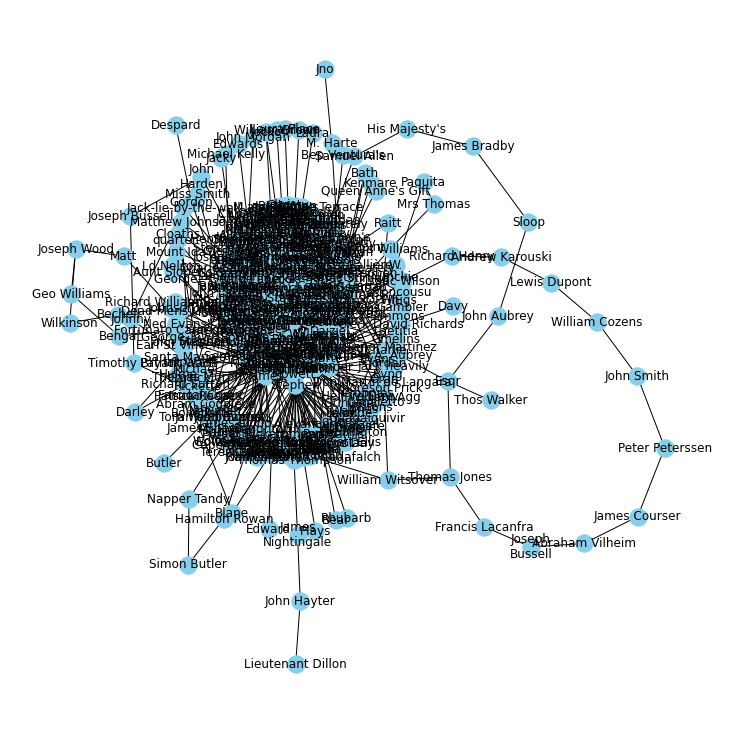

In [32]:
# plt.figure(figsize=(10,10))
# pos = nx.kamada_kawai_layout(G)
# nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
# plt.show()
plot_networkx_graph(G, figsize=(10,10))

In [33]:
# Graph visualization - Pyvis
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("aubrey.html")

### The most important characters in the books

In [34]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Jack': 0.5522388059701493,
 "Jack Aubrey's": 0.017412935323383085,
 'Mrs Harte': 0.02736318407960199,
 'Jack Aubrey': 0.03482587064676617,
 'Saturn': 0.007462686567164179,
 'Molly Harte': 0.03233830845771144,
 'Allen': 0.014925373134328358,
 'Hunks': 0.004975124378109453,
 'Samuel Allen': 0.004975124378109453,
 "His Majesty's": 0.004975124378109453,
 'James Bradby': 0.004975124378109453,
 'Sloop': 0.004975124378109453,
 'John Aubrey': 0.004975124378109453,
 'Esqr': 0.009950248756218905,
 'Thos Walker': 0.0024875621890547263,
 'Teniente': 0.0024875621890547263,
 'Alien': 0.004975124378109453,
 'Maturin': 0.017412935323383085,
 'Jep': 0.0024875621890547263,
 'Boccherini': 0.007462686567164179,
 'Mahon': 0.0472636815920398,
 'Port Mahon': 0.022388059701492536,
 'Harte': 0.0472636815920398,
 'Aubrey': 0.0845771144278607,
 'Captain Harte': 0.014925373134328358,
 'Stapleton': 0.004975124378109453,
 'Ragusan': 0.007462686567164179,
 'Molly': 0.007462686567164179,
 'Lady Warren': 0.014925373

<AxesSubplot:>

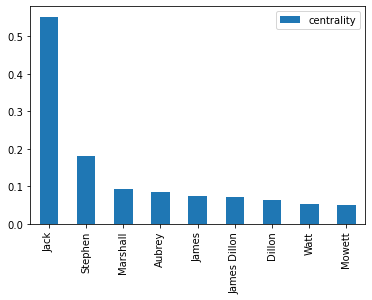

In [35]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

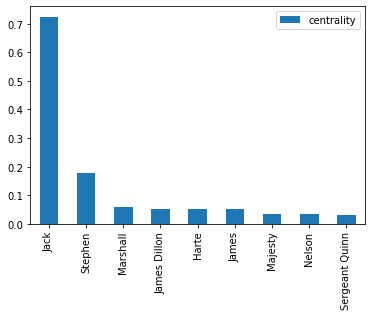

In [36]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

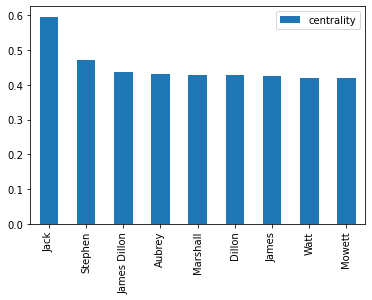

In [37]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")


In [38]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

### Community detection

In [39]:
import community as community_louvain

In [40]:
# 
communities = community_louvain.best_partition(G)
communities

{'Jack': 0,
 "Jack Aubrey's": 12,
 'Mrs Harte': 4,
 'Jack Aubrey': 3,
 'Saturn': 3,
 'Molly Harte': 4,
 'Allen': 5,
 'Hunks': 7,
 'Samuel Allen': 7,
 "His Majesty's": 7,
 'James Bradby': 7,
 'Sloop': 7,
 'John Aubrey': 7,
 'Esqr': 7,
 'Thos Walker': 7,
 'Teniente': 0,
 'Alien': 5,
 'Maturin': 3,
 'Jep': 0,
 'Boccherini': 3,
 'Mahon': 5,
 'Port Mahon': 10,
 'Harte': 3,
 'Aubrey': 4,
 'Captain Harte': 4,
 'Stapleton': 4,
 'Ragusan': 0,
 'Molly': 0,
 'Lady Warren': 4,
 'tarpaulin hats': 4,
 'Pigtail Steps': 0,
 'Williams': 5,
 'Johnstone': 0,
 'Graham': 0,
 'Gib': 5,
 'David Richards': 3,
 'Marshall': 10,
 'William Marshall': 9,
 'Majesty': 9,
 'Thankee': 0,
 'Bung': 11,
 'Watt': 5,
 'George Day': 5,
 'Mowett': 10,
 'Hereof': 0,
 'Canaletto': 10,
 'Lieutenant Aubrey': 0,
 'Stephen Maturin': 11,
 'Alicante': 0,
 'Gluck': 0,
 'Mozart': 0,
 'Stephen': 11,
 'Solander': 4,
 'Gmelins': 4,
 'Brown': 4,
 "St. Philip's": 0,
 'Fermanagh': 0,
 'Admiralty': 4,
 'Gambier': 2,
 'Saumarez': 2,
 "Earl Go

In [41]:
nx.set_node_attributes(G, communities, 'group')

com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("aubrey_communities.html")

### Evolution of characters' importance 
(would need more books to make this interesting)

In [42]:
from lib.utils.functions import *

ModuleNotFoundError: No module named 'lib'

In [ ]:
#all_books = [b for b in os.scandir('../data') if '.txt' in b.name]
#all_books


# Initialize empty list for graphs from books
books_graph = []
#all_books = [b for b in os.scandir('data') if '.txt' in b.name]
# Load spacy English language model
#nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [ ]:
def ner(file_name):
    """
    Function to process text from a text file (.txt) using Spacy.
    
    Params:
    file_name -- name of a txt file as string
    
    Returns:
    a processed doc file using Spacy English language model
    
    """
    # Load spacy English languague model
    nlp = spacy.load("en_core_web_sm")
    book_text = open(file_name).read()
    book_doc = nlp(book_text)
    
    return book_doc

In [ ]:
def get_ent_list_per_sentence(spacy_doc):
    """
    Get a list of entites per sentence of a Spacy document and store in a dataframe.
    
    Params:
    spacy_doc -- a Spacy processed document
    
    Returns:
    a dataframe containing the sentences and corresponding list of recognised named entities       in the sentences
    """
    
    sent_entity_df = []

    # Loop through sentences, store named entity list for each sentence
    for sent in spacy_doc.sents:
        entity_list = [ent.text for ent in sent.ents]
        sent_entity_df.append({"sentence": sent, "entities": entity_list})

    sent_entity_df = pd.DataFrame(sent_entity_df)
    
    return sent_entity_df

In [ ]:
def filter_entity(ent_list, character_df):
    """
    Function to filter out non-character entities.
    
    Params:
    ent_list -- list of entities to be filtered
    character_df -- a dataframe contain characters' names and characters' first names
    
    Returns:
    a list of entities that are characters (matching by names or first names).
    
    """
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            #or ent in list(character_df.character_firstname) I don't use first names
            ]


In [ ]:
def create_relationships(df, window_size):
    
    """
    Create a dataframe of relationships based on the df dataframe (containing lists of chracters per sentence) and the window size of n sentences.
    
    Params:
    df -- a dataframe containing a column called character_entities with the list of chracters for each sentence of a document.
    window_size -- size of the windows (number of sentences) for creating relationships between two adjacent characters in the text.
    
    Returns:
    a relationship dataframe containing 3 columns: source, target, value.
    
    """
    
    relationships = []

    for i in range(df.index[-1]):
        end_i = min(i + window_size, df.index[-1])
        char_list = sum((df.loc[i: end_i].character_entities), [])

        # Remove duplicated characters that are next to each other
        char_unique = [char_list[i] for i in range(len(char_list)) 
                       if (i==0) or char_list[i] != char_list[i-1]]

        if len(char_unique) > 1:
            for idx, a in enumerate(char_unique[:-1]):
                b = char_unique[idx + 1]
                relationships.append({"source": a, "target": b})
           
    relationship_df = pd.DataFrame(relationships)
    # Sort the cases with a->b and b->a
    relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), 
                                   columns = relationship_df.columns)
    relationship_df["value"] = 1
    relationship_df = relationship_df.groupby(["source","target"], 
                                              sort=False, 
                                              as_index=False).sum()
                
    return relationship_df

In [ ]:
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ent_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G) 

In [ ]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Jack", "Stephen", "Dundas", "Killick", "Joseph"]].plot()